# The belows code cover the following topics
**1. Verification of CLT for 3 variables(['monthly_expense','weekly_duration','watch_duration']) at 3 different sample sizes**\
**2. Normality test - ALL 4 VARIABLES**\
**3. Chi Square Test for the variables region and preferred cinema(Chi square test of independence)**
 -**Need to do more work in this**

In [1]:
# DATA STUFF AND LIBRARY IMPORTS
from scipy.stats import chisquare
import numpy as np
from scipy.stats import shapiro
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
df = pd.read_excel('preprocessed_data.xlsx')


**CLT**\
**1. Verification of CLT for 3 variables(['monthly_expense','weekly_duration','watch_duration']) at 3 different sample sizes**

In [2]:
def VerifyCLT(param,min,max,df,NoOfSamples,SampleSize,pltName,binSize):

    df=df[df[param]<=max]
    data=df[df[param]>=min]
    data=data[param].to_numpy()
    sampleMeans = []
    for i in range(0,NoOfSamples):
        sample = np.random.choice(data, size=SampleSize)
        sampleMeans.append(sample.mean())

    sampleMeans=np.array(sampleMeans)

    plt.title(f'CLT verification for {pltName}',fontsize=15)
    plt.xlabel(f'Plotting sample means for {NoOfSamples} samples each of size {SampleSize}')
    plt.ylabel('Frequency')
    
    # Finding the mean and standard deviation of the data
    mu = np.mean(sampleMeans)
    sigma = np.std(sampleMeans)
    
    # Generate x-values to evaluate the Gaussian distribution
    x = np.linspace(sampleMeans.min(), sampleMeans.max(), 1000)

    # Evaluate the Gaussian distribution for each x point
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

    # Plot the data and the Gaussian distribution
    plt.hist(sampleMeans, bins=binSize, density=True, alpha=0.65,label='Histogram of sample mean')
    plt.plot(x, y, 'orange',label='Guassian')
    plt.legend()
    plt.show()

**Watch-Duration CLT**

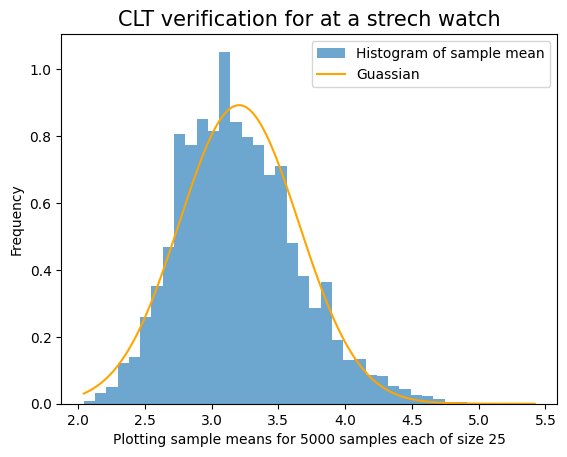

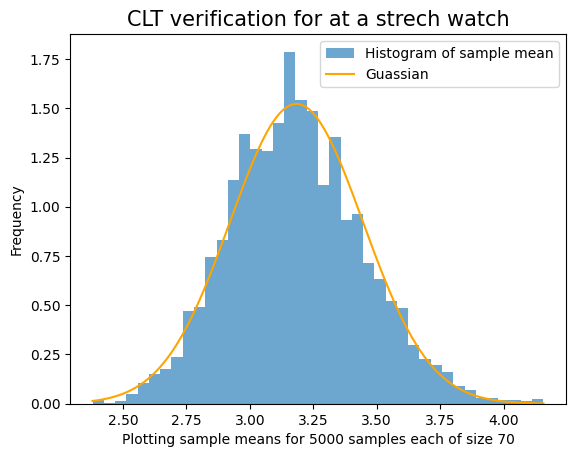

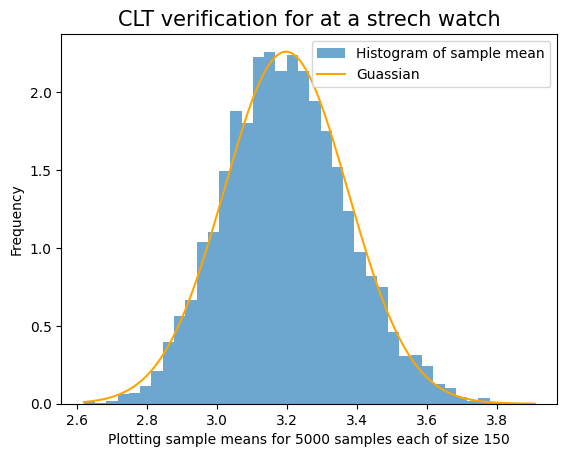

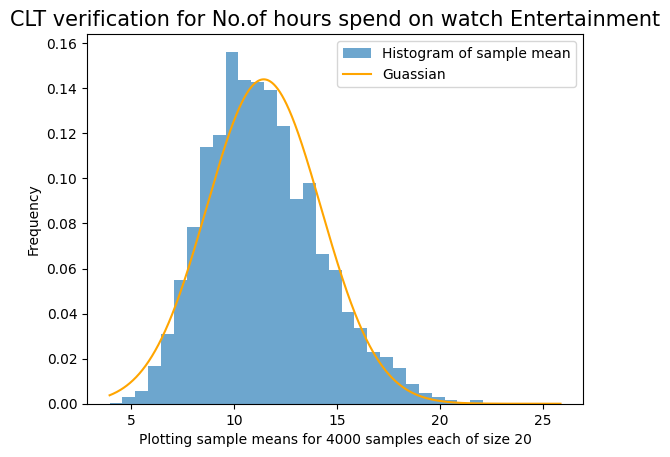

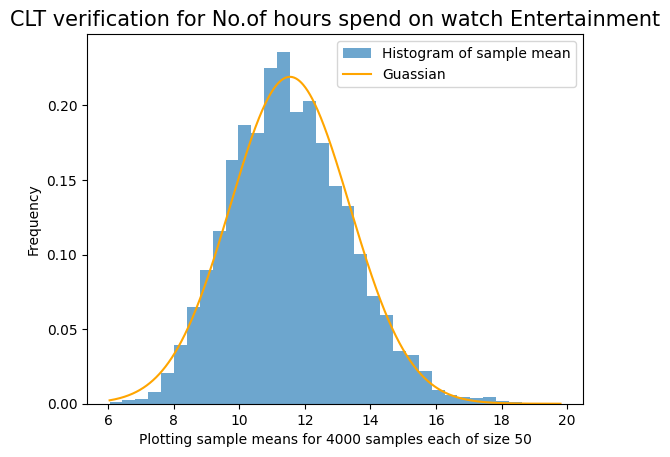

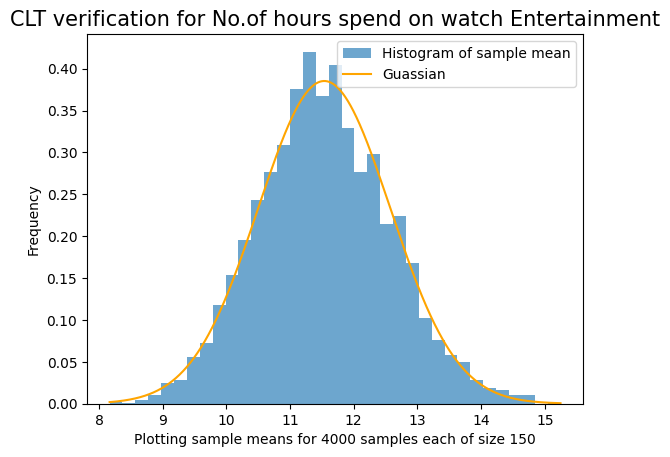

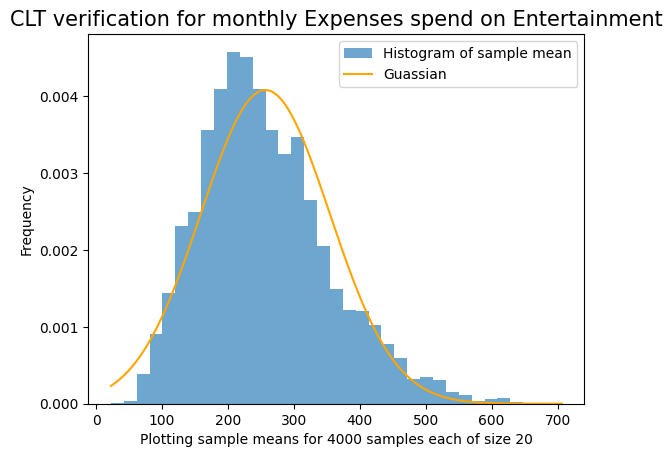

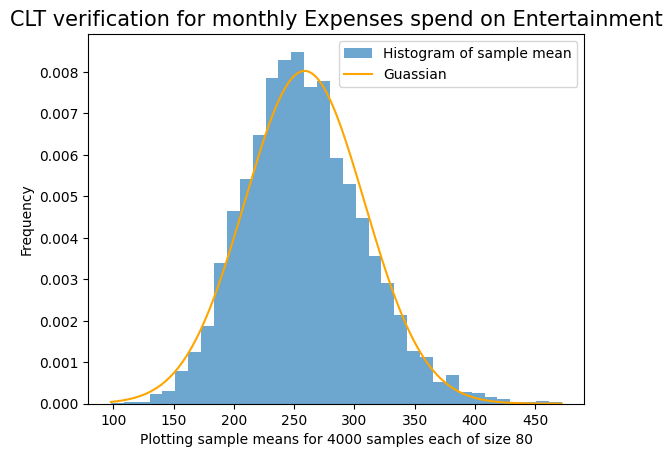

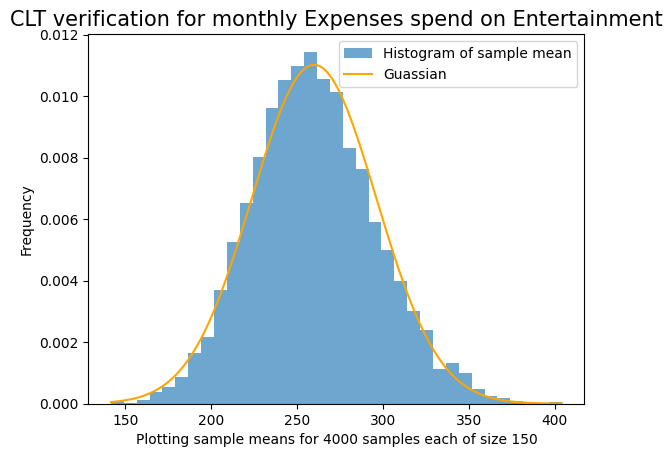

In [3]:
BinSizes=[40,35,35]
PlotNames=['at a strech watch','No.of hours spend on watch Entertainment','monthly Expenses spend on Entertainment']
VerifyCLT('watch_duration',0,20,df,5000,25,PlotNames[0],BinSizes[0])
VerifyCLT('watch_duration',0,20,df,5000,70,PlotNames[0],BinSizes[0])
VerifyCLT('watch_duration',0,20,df,5000,150,PlotNames[0],BinSizes[0])
VerifyCLT('weekly_duration',0,140,df,4000,20,PlotNames[1],BinSizes[1])
VerifyCLT('weekly_duration',0,140,df,4000,50,PlotNames[1],BinSizes[1])
VerifyCLT('weekly_duration',0,140,df,4000,150,PlotNames[1],BinSizes[1])
VerifyCLT('monthly_expense',0,5000,df,4000,20,PlotNames[2],BinSizes[2])
VerifyCLT('monthly_expense',0,5000,df,4000,80,PlotNames[2],BinSizes[2])
VerifyCLT('monthly_expense',0,5000,df,4000,150,PlotNames[2],BinSizes[2])

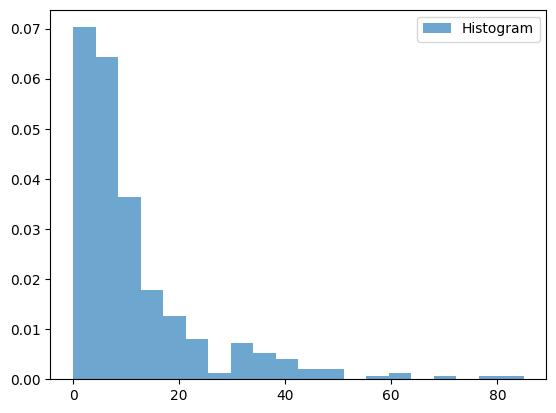

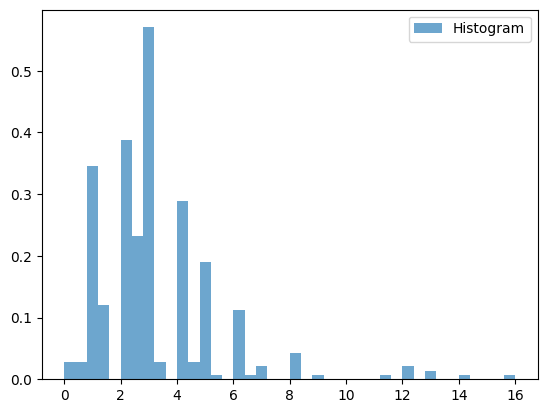

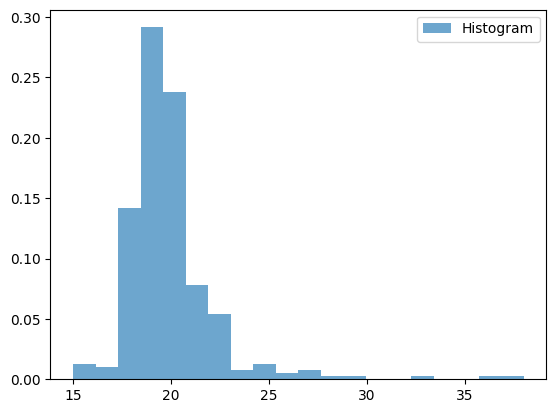

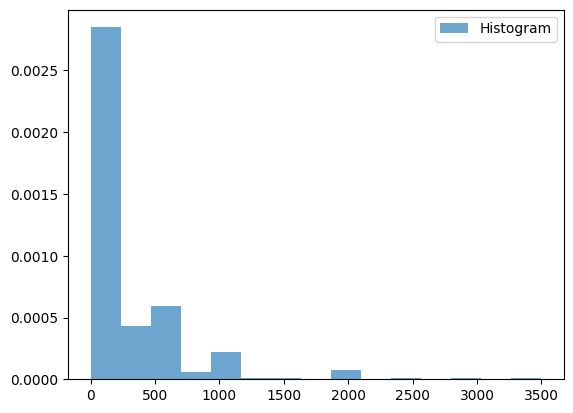

In [4]:
# Plotting all the numerical variables
plt.hist(df['weekly_duration'].to_numpy(), bins=20, density=True, alpha=0.65,label='Histogram')
plt.legend()
plt.show()

plt.hist(df['watch_duration'].to_numpy(), bins=40, density=True, alpha=0.65,label='Histogram')
plt.legend()
plt.show()

plt.hist(df['age'].to_numpy(), bins=20, density=True, alpha=0.65,label='Histogram')
plt.legend()
plt.show()

plt.hist(df['monthly_expense'].to_numpy(), bins=15, density=True, alpha=0.65,label='Histogram')
plt.legend()
plt.show()

**NORMALITY TEST USING Shapiro-Wilk TEST**

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def TestForNormality(df,VariableName,PlotName):
    data=df[VariableName].to_numpy()
    stat, p = stats.shapiro(data)
    print('Shapiro-Wilk test statistic:', stat)
    print('p-value:', p)
    
#     null hypothesis is that the sample comes from a normal distribution

    if(p<0.05): print("The variable doesn't come from normal distribution")
    else: print("sample comes from a normal distribution")
    
    # Plot histogram
    plt.hist(data, bins=20, density=True, color='skyblue', alpha=0.7,label='Empirical Distribution')

    # Add a normal distribution curve for comparison
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = stats.norm.pdf(x, loc=np.mean(data), scale=np.std(data))
    plt.plot(x, p, 'blue', linewidth=2,alpha=0.8,label='Normal Distribution')
    plt.axvline(data.mean(), color='maroon', linewidth=2,label='Mean',ymax=np.max(data))
    plt.axvline(np.median(data), color='green', linewidth=2,label='Median',ymax=np.max(data))
    
    # Set axis labels and title
    plt.xlabel(f'{PlotName}')
    plt.ylabel('Frequency')
    plt.title(f'Plot of {PlotName}')
    plt.legend()
    plt.show()

Shapiro-Wilk test statistic: 0.7325865030288696
p-value: 1.707364789327855e-23
The variable doesn't come from normal distribution


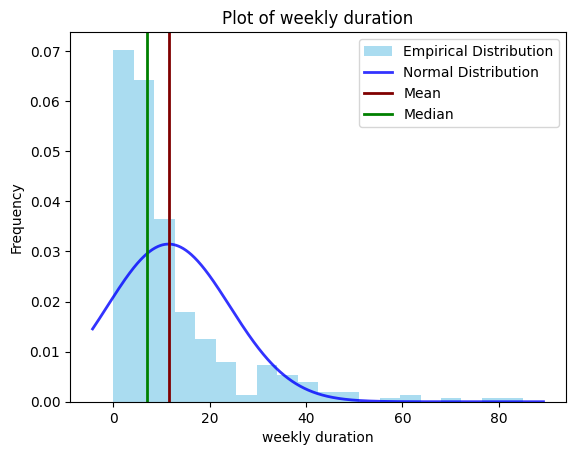

Shapiro-Wilk test statistic: 0.6118170619010925
p-value: 1.690609616353298e-27
The variable doesn't come from normal distribution


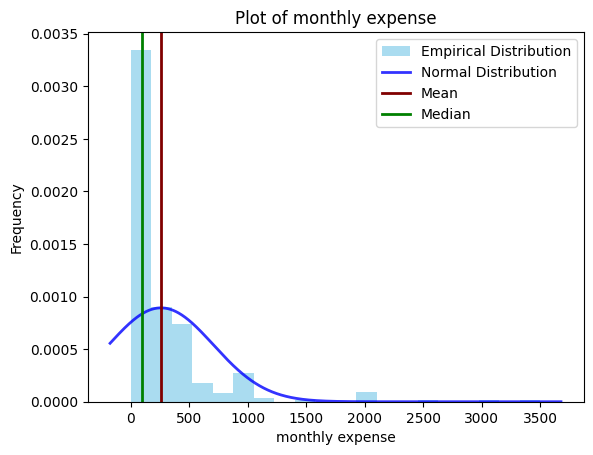

Shapiro-Wilk test statistic: 0.8019430041313171
p-value: 1.6405049804935118e-20
The variable doesn't come from normal distribution


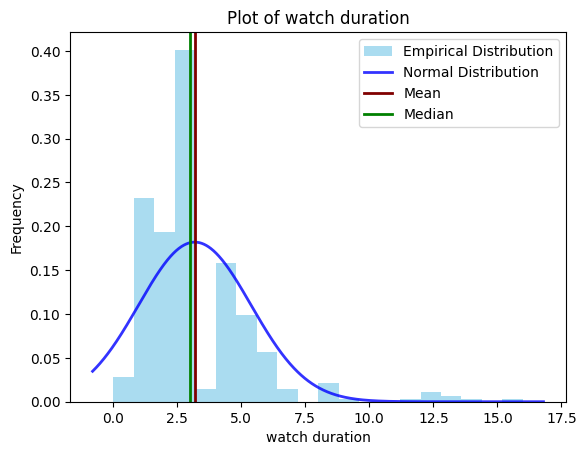

Shapiro-Wilk test statistic: 0.6929173469543457
p-value: 6.098102859422173e-25
The variable doesn't come from normal distribution


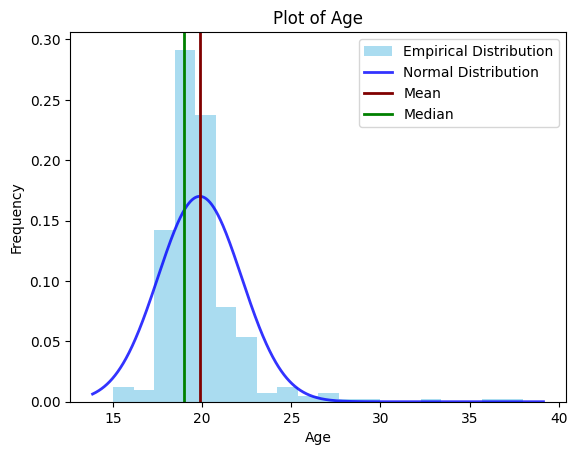

In [6]:
# NORMALITY TEST
TestForNormality(df,'weekly_duration','weekly duration')
TestForNormality(df,'monthly_expense','monthly expense')
TestForNormality(df,'watch_duration','watch duration')
TestForNormality(df,'age','Age')
# numericalvariables=[['monthly_expense','Monthly expenses'],['weekly_durat ion','Time Spent Weekly'],['watch_duration','Hoursof watch at a strech'],['age','age']]


**Test for normality using QQPlot**

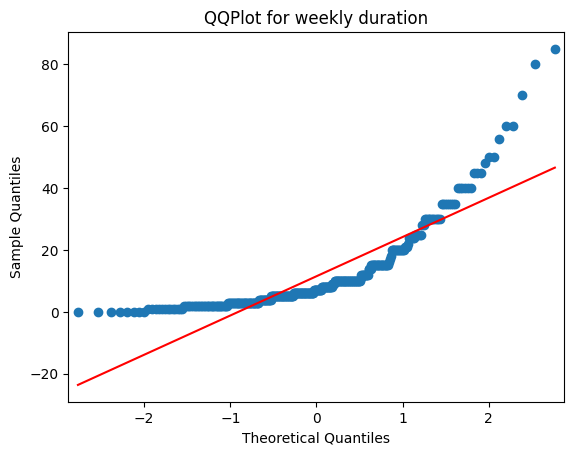

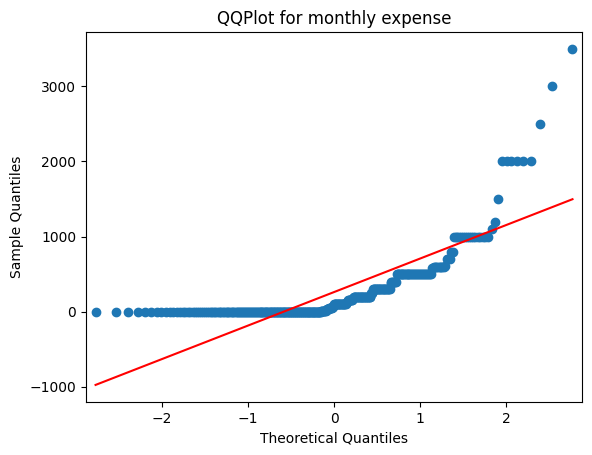

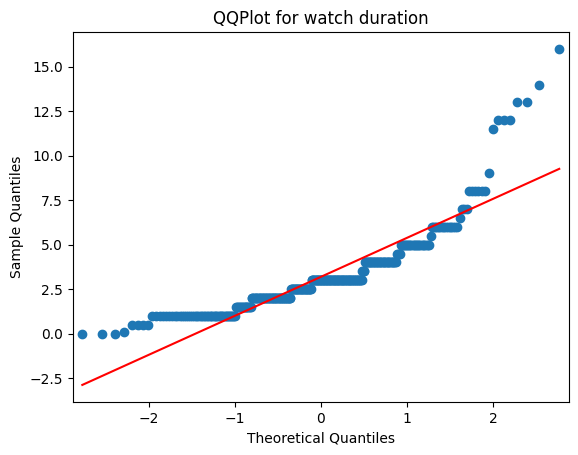

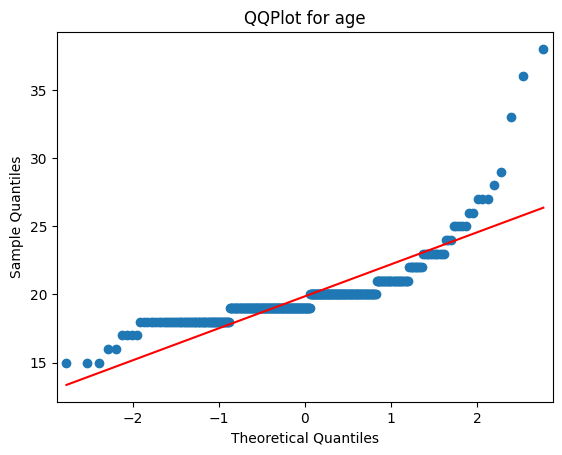

In [7]:

from statsmodels.graphics.gofplots import qqplot

qqplot(df['weekly_duration'], line='s')
plt.title('QQPlot for weekly duration')
plt.show()

qqplot(df['monthly_expense'], line='s')
plt.title('QQPlot for monthly expense')
plt.show()

qqplot(df['watch_duration'], line='s')
plt.title('QQPlot for watch duration')
plt.show()

qqplot(df['age'], line='s')
plt.title('QQPlot for age')
plt.show()

**Chi square test of independence(Need to work more)**

In [8]:
# The steps in hypothesis testing remain the same with
# H0 : the two categorical variables are independent.
# Ha : the two categorical variables are dependent.

In [43]:
from scipy.stats import chi2_contingency
# create a contingency table
CT=df.loc[:, ['region', 'preferred_cinema']]
# Region=['South India','North India']
#Preferred_cinema=['Bollywood','SouthCinema','Hollywood','otherCinema',NULL]
       #                 0                                                4
#                 # N-N, N-S, S-N , S-S
Preferred_cinema=[   0,  0,    0,  0  ]
#        NI,SI
Region=[ 0, 0 ]

south=2
i=0
z=0
for dataPoint in CT.to_numpy():
    i+=1
    if(dataPoint[0]==0):
        Region[0]+=1
        if(dataPoint[1]==0):
            Preferred_cinema[0]+=1
        elif(dataPoint[1]==south):
            Preferred_cinema[1]+=1
        else:z+=1
    elif(dataPoint[0]==1):
        Region[1]+=1
        if(dataPoint[1]==0):
            Preferred_cinema[2]+=1
        elif(dataPoint[1]==south):
            Preferred_cinema[3]+=1
        else: z+=1

print(Preferred_cinema)
print(i,Region[0],Region[1],z)

observed = [[Preferred_cinema[0],Preferred_cinema[1]], [Preferred_cinema[2],Preferred_cinema[3]]]

# perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)
# print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)



[64, 12, 8, 7]
355 183 172 264
Chi-square statistic: 5.481651245254951
p-value: 0.019217097462432296
Degrees of freedom: 1
Expected frequencies: [[60.13186813 15.86813187]
 [11.86813187  3.13186813]]


In [10]:

observed = [[Preferred_cinema[0],Preferred_cinema[1]], [Preferred_cinema[2],Preferred_cinema[3]]]

# perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(observed)
# print results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 20.2994411538232
p-value: 6.62199226825564e-06
Degrees of freedom: 1
Expected frequencies: [[49.17073171 90.82926829]
 [22.82926829 42.17073171]]
